# DATA 601- Working with Data Visualization

# Team Project: Impact of Weather and Community Disorder on Crime in Calgary 
## University of Calgary | Faculty of Graduate Studies & Faculty of Science

## Submitted by: 
* ## Joshua Ogunbo | 30272413
* ## Prince Oloma | 30263726
* ## Ravin Jayasuriya | 30022788

## Submitted to: Syyed Tauhid Ullah Shah 

## Date Submitted: February 13, 2025

## Repository Link: https://github.com/Ravin-J/DATA-601-Final-Project

# Table of Contents
1. [Introduction](#introduction)
2. [Guiding Questions](#guiding-questions)
3. [Packages](#packages)
4. [Datasets](#datasets)
5. [Wrangling](#wrangling)
6.  [Analysis](#analysis)
    1. [Question 1: What are the types and counts of crimes that occurred in the last 5 years?](#q-1)
    2. [Question 2: Which are the top 5 recurring crimes for each season in the last 5 years?](#q-2)
    3. [Question 3: Which ward has the highest crime rate in the last 5 years?](#q-3)
    4. [Question 4: Identifying relationship between crime count and disorder count. ](#q-4)
7.  [Conclusions and Suggestions](#conclusion)
8.  [Contributions](#contributions)
9.  [References](#references)



## 1. Introduction <a name="introduction"></a>

This study examines the relationship between crime rates, community disorder and weather patterns across Calgary’s wards. By analyzing historical crime data alongside weather data, the study aims to determine whether weather conditions influence fluctuations in crime rates.  

Understanding this relationship will provide valuable insights for policymakers, law enforcement agencies, and community stakeholders. This will enable the development of data-driven strategies for crime prevention and enhanced public safety. 



## 2. Guiding Questions <a name="guiding-questions"></a>

Question 1: What are the types and counts of crimes that occurred in the last 5 years?
   

Question 2: Which are the top 5 recurring crimes for each season in the last 5 years?
  

Question 3: Which ward has the highest crime rate in the last 5 years?
  

Question 4: Is there a relationship between crime count and community disorder count?
 

## 3. Packages <a name="packages"></a>


**Pandas**

The Pandas Python library has been imported in order to easily manipulate numerical tables and time series data. It has enabled the team to read the dataset into the Jupyter Notebook.

**Matplotlib**

This Python library has been imported in order to create easy-to-read visualizations, including various plots, add customizations to styles and layouts of the visualizations, and embedded into the Jupyter Notebook. This library is used for our numeric variables to create visualizations such: Bar charts, Line Graph Series, Heat Maps e.t.c.

**Seaborn**

The Seaborn Python data visualization library has been imported to provide high-level and informative statistical graphics to capture the data story-telling aspect of the project. This library is used for our numeric variables to create visualizations such as: bar charts, Heat Maps. 

**Geopandas**

The geopandas library in Python is used for working with geospatial data. It extends the capabilities of pandas to handle spatial data types like points, lines, and polygons, making it easier to perform spatial operations and analysis. We used this library for plotting our HeatMaps showing geographical information of crime frequencies by ward.






In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## 4. Datasets <a name="datasets"></a>

### Calgary Weather Dataset

Time period: 2018-2024

In [3]:
calgary_weather_data_one_path = "./datasets/calgary_weather_data_20180101_20220101.csv"
calgary_weather_data_two_path = "./datasets/calgary_weather_data_20220101_20250101.csv"

calgary_weather_dfs = []
    
for index, path in enumerate([calgary_weather_data_one_path, calgary_weather_data_two_path] ):
    calgary_weather_dfs.append(pd.read_csv(path, encoding="latin-1"))

calgary_weather_df = pd.concat(calgary_weather_dfs, ignore_index=True)


display(calgary_weather_df.head())
display(calgary_weather_df.info())

,Station Name,Date (Local Standard Time),Air Temp. Avg. (°C),Air Temp. Avg. Source Flag,Air Temp. Avg. Record Completeness (%),Air Temp. Avg. Comment,Air Temp. Avg. Normal (°C),Air Temp. Avg. Normal Source Flag,Air Temp. Avg. Normal Comment
0,Calgary Int'L CS,January-2018,-6.9,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN
1,Calgary Int'L CS,February-2018,-12.4,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN
2,Calgary Int'L CS,March-2018,-5.8,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN
3,Calgary Int'L CS,April-2018,1.0,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN
4,Calgary Int'L CS,May-2018,14.1,AGGREGATED,100.0,"Completeness breakdown - Actual: 100%, Estimat...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Station Name                            86 non-null     object 
 1   Date (Local Standard Time)              86 non-null     object 
 2   Air Temp. Avg. (°C)                     86 non-null     float64
 3   Air Temp. Avg. Source Flag              86 non-null     object 
 4   Air Temp. Avg. Record Completeness (%)  86 non-null     float64
 5   Air Temp. Avg. Comment                  86 non-null     object 
 6   Air Temp. Avg. Normal (°C)              37 non-null     float64
 7   Air Temp. Avg. Normal Source Flag       37 non-null     object 
 8   Air Temp. Avg. Normal Comment           37 non-null     object 
dtypes: float64(3), object(6)
memory usage: 6.2+ KB


None

### Calgary Community Crime Dataset

Time period: 2018-2025

In [4]:
calgary_communinty_crime_statistics_path = "./datasets/community_crime_statistics_calgary.csv"

calgary_crime_df = pd.read_csv(calgary_communinty_crime_statistics_path)

display(calgary_crime_df.head())
display(calgary_crime_df.info())

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75595 entries, 0 to 75594
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Community    75595 non-null  object
 1   Category     75595 non-null  object
 2   Crime Count  75595 non-null  int64 
 3   Year         75595 non-null  int64 
 4   Month        75595 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ MB


None

### Calgary Community Ward Dataset

Time Period: 2014

In [5]:
calgary_communities_by_ward_path =  "./datasets/communities_by_ward_calgary.csv"

calgary_communities_by_ward_df = pd.read_csv(calgary_communities_by_ward_path)

display(calgary_communities_by_ward_df.head())
display(calgary_communities_by_ward_df.info())

,COMM_CODE,CLASS,CLASS_CODE,NAME,SECTOR,SRG,COMM_STRUCTURE,WARD_NUM
0,CRA,Residential,1,CRANSTON,SOUTHEAST,COMPLETE,BUILDING OUT,12
1,PKH,Residential,1,PARKHILL,CENTRE,ESTABLISHED,1950s,8
2,CRE,Residential,1,CRESCENT HEIGHTS,CENTRE,ESTABLISHED,INNER CITY,7
3,ROY,Residential,1,ROYAL OAK,NORTHWEST,COMPLETE,2010s,1
4,ALP,Residential,1,ALPINE PARK,SOUTH,DEVELOPING,BUILDING OUT,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMM_CODE       312 non-null    object
 1   CLASS           312 non-null    object
 2   CLASS_CODE      312 non-null    int64 
 3   NAME            312 non-null    object
 4   SECTOR          312 non-null    object
 5   SRG             251 non-null    object
 6   COMM_STRUCTURE  310 non-null    object
 7   WARD_NUM        312 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 19.6+ KB


None

### Calgary Community Disorder Dataset

Time period: 2018-2024



In [6]:
calgary_community_disorder_statistics_path = "./datasets/community_disorder_statistics_calgary.csv"
calgary_disorder_df = pd.read_csv(calgary_community_disorder_statistics_path)

display(calgary_disorder_df.head())
display(calgary_disorder_df.info())

,Community,Category,Event Count,Year,Month
0,01B,Disorder,1,2018,2
1,01B,Disorder,2,2018,6
2,01B,Disorder,1,2018,8
3,01B,Disorder,1,2018,10
4,01B,Disorder,2,2018,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21445 entries, 0 to 21444
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Community    21445 non-null  object
 1   Category     21445 non-null  object
 2   Event Count  21445 non-null  int64 
 3   Year         21445 non-null  int64 
 4   Month        21445 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 837.8+ KB


None

## Calgary Geodata 

This is the city of calgary geodata map, which identifies the ward, and their geospatial data. 



In [7]:
calgary_geodata_path = "./geos/calgary_wards_geo.geojson"

calgary_geo_map = gpd.read_file(calgary_geodata_path)
calgary_geo_map.rename(columns={'ward_num': 'Ward Number'}, inplace=True)
calgary_geo_map["Ward Number"] = calgary_geo_map["Ward Number"].astype(float)

if calgary_geo_map.crs.is_geographic:
    calgary_geo_map = calgary_geo_map.to_crs(epsg=3857)

display(calgary_geo_map.head())
display(calgary_geo_map.info())

,councillor,Ward Number,label,geometry
0,Sonya Sharp,1.0,WARD 1,"MULTIPOLYGON (((-12713923.109 6653792.085, -12..."
1,Jennifer Wyness,2.0,WARD 2,"MULTIPOLYGON (((-12700950.937 6656379.251, -12..."
2,Jasmine Mian,3.0,WARD 3,"MULTIPOLYGON (((-12691901.442 6658955.667, -12..."
3,Sean Chu,4.0,WARD 4,"MULTIPOLYGON (((-12703925.472 6645856.311, -12..."
4,Raj Dhaliwal,5.0,WARD 5,"MULTIPOLYGON (((-12683182.109 6653825.135, -12..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   councillor   14 non-null     object  
 1   Ward Number  14 non-null     float64 
 2   label        14 non-null     object  
 3   geometry     14 non-null     geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 580.0+ bytes


None

## Cleaning & Wrangling <a name="wrangling"></a>


### Weather Data

Dropped columns that werent necessary. Kept the data for "Station Name", "Date (Local Standard Time)", "Air Temperature Average C". 

Split "Date (Local Standard Time)" into "Day" and "Month"

Renamed "Air Temp. Avg C" to "Avg Temp"

In [8]:
calgary_weather_df[["Month", "Year"]] = calgary_weather_df["Date (Local Standard Time)"].str.split(
      "-", expand=True )

calgary_weather_df["Month"] = pd.to_datetime(calgary_weather_df["Month"], format="%B").dt.month
calgary_weather_df["Year"] = calgary_weather_df["Year"].astype(int)
calgary_weather_df["Avg Temp"] = calgary_weather_df["Air Temp. Avg. (°C)"].astype(float)

calgary_weather_df = calgary_weather_df.drop(columns=[
      "Date (Local Standard Time)",
      "Air Temp. Avg. (°C)",
      "Air Temp. Avg. Source Flag",
      "Air Temp. Avg. Record Completeness (%)",	
      "Air Temp. Avg. Comment",
      "Air Temp. Avg. Normal (°C)", 
      "Air Temp. Avg. Normal Source Flag",	
      "Air Temp. Avg. Normal Comment"])

display(calgary_weather_df.head())

,Station Name,Month,Year,Avg Temp
0,Calgary Int'L CS,1,2018,-6.9
1,Calgary Int'L CS,2,2018,-12.4
2,Calgary Int'L CS,3,2018,-5.8
3,Calgary Int'L CS,4,2018,1.0
4,Calgary Int'L CS,5,2018,14.1


Added in the season into the calgary_weather_df dataframe. This will be used for our seasonal analysis. The winter season is an edge case because it begins from the previous year december.

### Community Crime and Ward Data 

First we select the relevent columns from the calgary_communities_by_ward_df which are "NAME" and "WARD_NUM". 

We change these columns to the names "Community" and "Ward Number" respectively. 

We then merge in the calgary community crime data with the "Ward Number" on the "Community" column. 

Our final dataframe then contains the "Ward Number" associated with each crime that occured in Calgary 

In [9]:

calgary_communities_by_ward_df  = calgary_communities_by_ward_df [["NAME", "WARD_NUM"]]
calgary_communities_by_ward_df .rename(columns={"NAME": "Community", "WARD_NUM": "Ward Number"}, inplace=True)

calgary_crime_wards_df = calgary_crime_df.merge(calgary_communities_by_ward_df [["Community", "Ward Number"]], on="Community", how="left")

print(calgary_crime_wards_df.head())

  Community                    Category  Crime Count  Year  Month  Ward Number
0       01B      Assault (Non-domestic)            1  2022     11          1.0
1       01B  Break & Enter - Commercial            1  2019      6          1.0
2       01B  Break & Enter - Commercial            1  2019      8          1.0
3       01B  Break & Enter - Commercial            2  2020      3          1.0
4       01B  Break & Enter - Commercial            2  2020      7          1.0


### Community Disorder, weather, crime, community wards

First we merge in the crime data with the weather data on the Year and Month allowing us to add the 'Avg Temp' column and retain all previous information in the calgary_crime_wards_df. We create a new dataframe to hold all the information called the working_df. We now have the community crime dataset, the weather dataset, and the community, ward dataset information within one dataframe. 

Next the community disorder event data is merged in to the working_df on "Year", "Month", "Community", so that all the disorder events are linked to the correct community 

Some of the communities are missing a disorder count. We fill in these null values wth 0, to handle the missing disorder counts. 

In [10]:
working_df = calgary_crime_wards_df.merge(calgary_weather_df[['Year', 'Month', 'Avg Temp']], on=['Year', 'Month'], how="left")   
working_df = working_df.merge(
    calgary_disorder_df[['Year','Month','Event Count', 'Community']], 
    on=['Year', 'Month', 'Community'], 
    how="left"
)

working_df["Disorder Count"] = working_df["Event Count"].fillna(0)

working_df.drop(columns=["Event Count"], inplace=True)

display(working_df.head())


,Community,Category,Crime Count,Year,Month,Ward Number,Avg Temp,Disorder Count
0,01B,Assault (Non-domestic),1,2022,11,1.0,-5.8,0.0
1,01B,Break & Enter - Commercial,1,2019,6,1.0,13.6,1.0
2,01B,Break & Enter - Commercial,1,2019,8,1.0,15.3,1.0
3,01B,Break & Enter - Commercial,2,2020,3,1.0,-4.6,0.0
4,01B,Break & Enter - Commercial,2,2020,7,1.0,16.6,2.0


### Handling the edge case for december 

We merged in the community disorder dataset with the community crime dataset, weather dataset, and the community ward dataset. Some of the communities are missing the disorder count, so we filled those values with zero. 

In [11]:
def convert_month_season(month):
    if month in [0, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

new_rows = []
for year in working_df["Year"].unique():
    df_december = working_df[(working_df["Year"] == year) & (working_df["Month"] == 12)].copy()
    if not df_december.empty:
        df_december["Year"] = year + 1  # Shift to the next year
        df_december["Month"] = 0  # Set Month to 0
        new_rows.append(df_december)

if new_rows:
    working_df = pd.concat([working_df] + new_rows, ignore_index=True)
    working_df = working_df.sort_values(by=["Year", "Month"], ascending=[True, True])


working_df["Season"] = working_df["Month"].apply(convert_month_season)

display(working_df.head())

,Community,Category,Crime Count,Year,Month,Ward Number,Avg Temp,Disorder Count,Season
11,01B,Theft FROM Vehicle,1,2018,1,1.0,-6.9,0.0,Winter
34,01K,Assault (Non-domestic),1,2018,1,1.0,-6.9,0.0,Winter
54,01K,Break & Enter - Commercial,1,2018,1,1.0,-6.9,0.0,Winter
62,01K,Theft FROM Vehicle,1,2018,1,1.0,-6.9,0.0,Winter
99,01K,Violence 'Other' (Non-domestic),1,2018,1,1.0,-6.9,0.0,Winter


In [12]:
test_1 = working_df[(working_df["Year"] == 2018) & (working_df["Month"] == 11)  & (working_df["Community"] == "02K") ]
print(test_1)

test_2 = working_df[(working_df["Year"] == 2019) & (working_df["Month"] == 0) &(working_df["Category"] == "Theft FROM Vehicle") & (working_df["Community"] == "02K") ]
print(test_2)

    Community                          Category  Crime Count  Year  Month  \
302       02K  Violence  'Other' (Non-domestic)            1  2018     11   

     Ward Number  Avg Temp  Disorder Count Season  
302          2.0      -0.7             0.0   Fall  
      Community            Category  Crime Count  Year  Month  Ward Number  \
80136       02K  Theft FROM Vehicle            2  2019      0          2.0   

       Avg Temp  Disorder Count  Season  
80136      -3.5             0.0  Winter  


## Year in View 

Our report is going to be based on the last five years from 2020-2024. 

In [13]:
years_in_view = [2020, 2021, 2022, 2023, 2024]
city = "Calgary"

## 6 :Analysis <a name="analysis"></a>

## 6. Question 1: What are the types and counts of crimes that occurred in the last 5 years? <a name="#q-1"></a>
  
In order to answer this question we will loop through all our years in view. Then we filter the data for each specific year. 

The data is then grouped by "Category" and "Month" and then we count up all crime counts for those respective categories. 

We then plot the data. 


Another plot is created but in this case we aggregate all of the crime counts for each month across all years for each crime category. Than we can get a look of what the data looked like in all five years. 

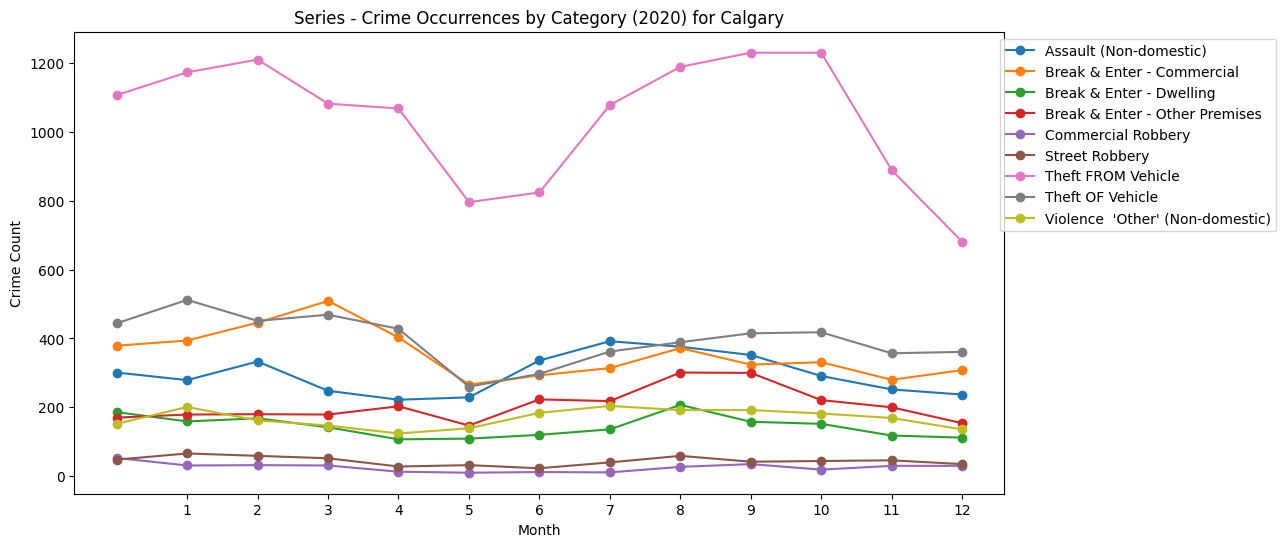

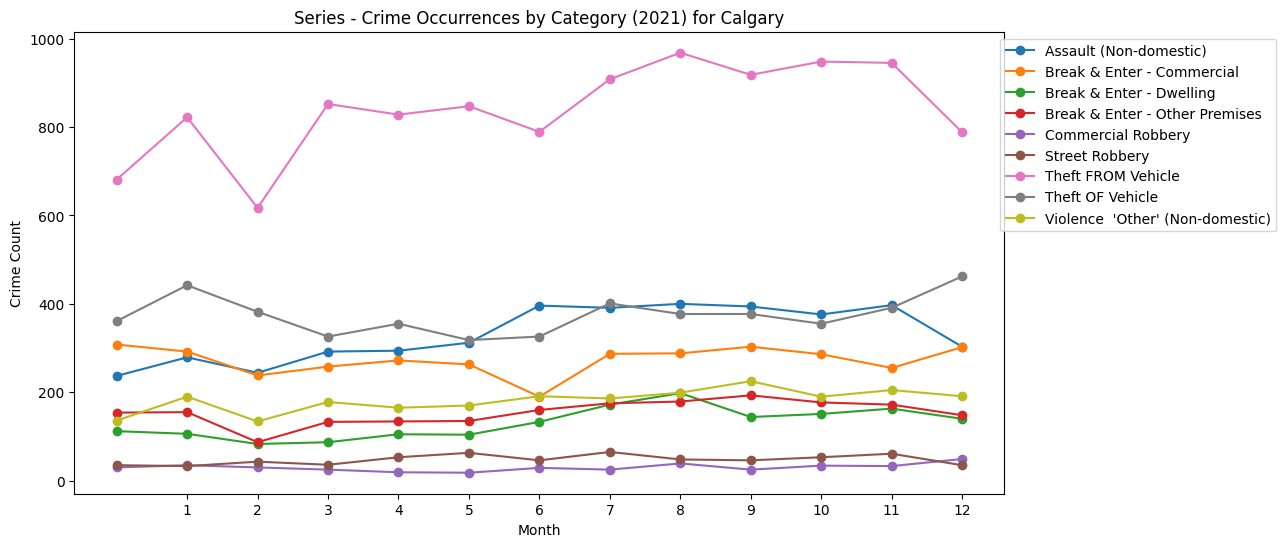

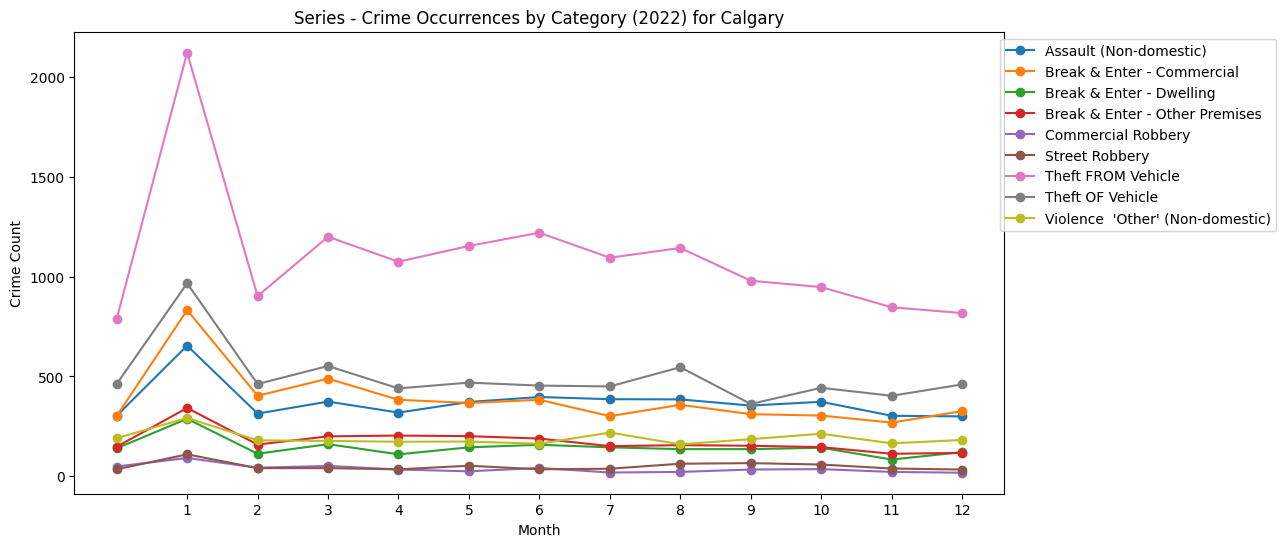

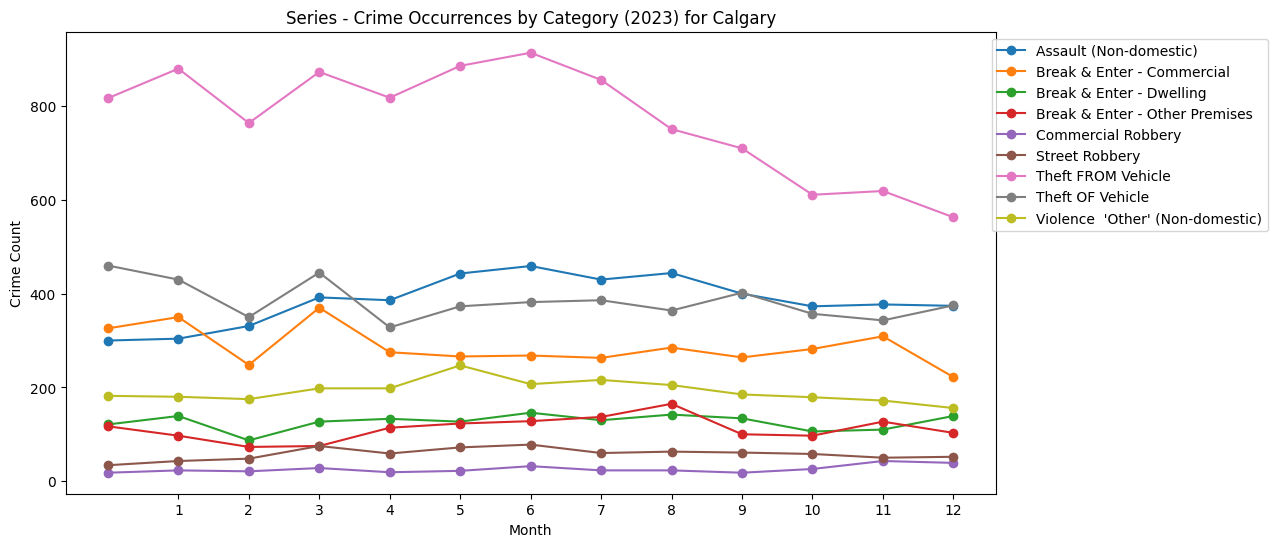

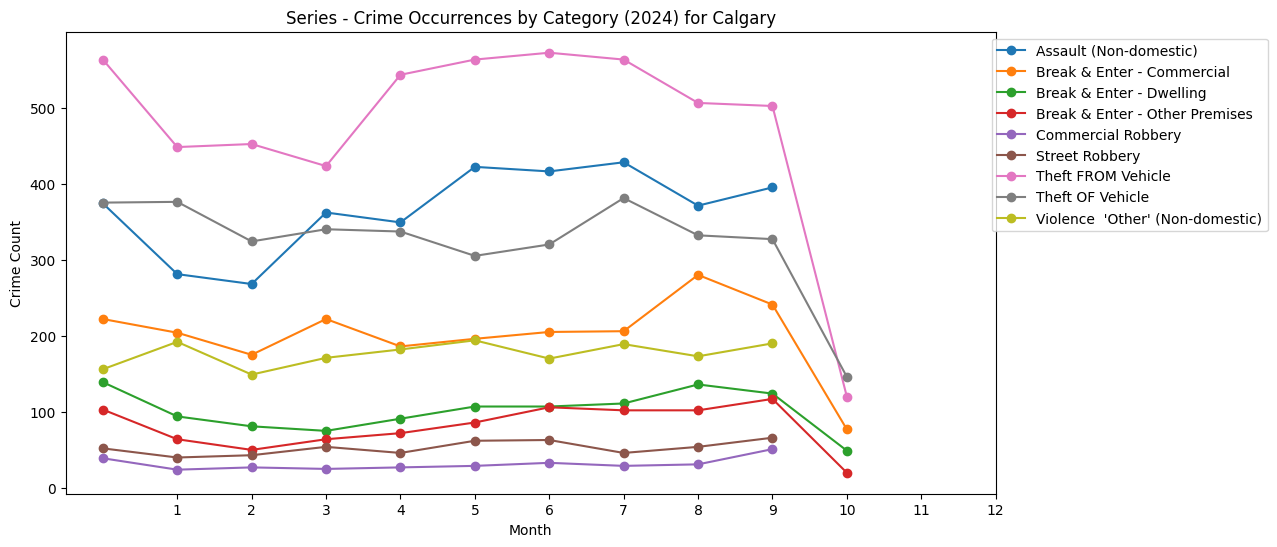

In [14]:
for year in years_in_view:
    crime_year = working_df[working_df["Year"] == year]
    crime_grouped = (
        crime_year.groupby(["Category", "Month"])["Crime Count"].sum().reset_index()
    )

    plt.figure(figsize=(12, 6))

    for category in crime_grouped["Category"].unique():
        subset = crime_grouped[crime_grouped["Category"] == category]
        plt.plot(subset["Month"], subset["Crime Count"], marker="o", label=category)

    plt.xlabel("Month")
    plt.ylabel("Crime Count")
    plt.title(f"Series - Crime Occurrences by Category ({year}) for {city}")
    plt.xticks(range(1, 13))
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
    plt.show()




Key Observations: 

1. "Theft from Vehicle" is the highest crime count across all years. 

2. "Assault (Non-domestic)" and Theft OF Vehicle are the the second highest categories, they can alternate positions given the year.

3. There was a significant spike in crime in 2022 for Theft from Vehicle in January, possibly due to effects post pandemic. 

4. There is a drop off in crime rates in 2024, due to a loss in data, not because of a particular event. 

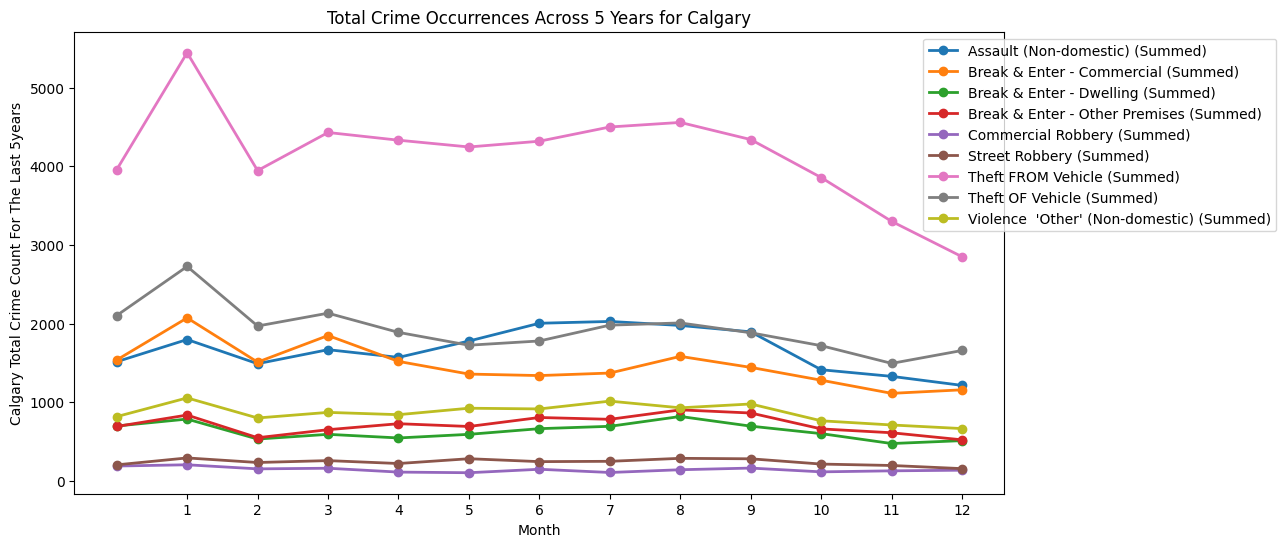

In [15]:
filtered_df = working_df[working_df["Year"].isin(years_in_view)]

total_crime = (
    filtered_df.groupby(["Category", "Month"])["Crime Count"].sum().reset_index()
)

plt.figure(figsize=(12, 6))

for category in total_crime["Category"].unique():
    subset = total_crime[total_crime["Category"] == category]
    plt.plot(
        subset["Month"],
        subset["Crime Count"],
        marker="o",
        linewidth=2,
        label=f"{category} (Summed)",
    )

plt.xlabel("Month")
plt.ylabel(f"{city} Total Crime Count For The Last 5years")
plt.title(f"Total Crime Occurrences Across {len(years_in_view)} Years for {city}")
plt.xticks(range(1, 13))
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()

Key Observations: 

1. Looking at the results from the data set across all 5 years Theft from Vehicle has the highest crime count in every single month. It seems to occur more during the colder months. Maybe due to people leaving cars running. 

2. 'Theft of Vehicle' and 'Assault' are the next highest crime categories. They also seem to show a peak in the winter months. 

3. The remaining crime types have lower frequences and have less variability, indicated by less peaks and troughs throughout the year. 



Next, we will look at a bar chart that displays the crime count for each year in our years in view. 

This will allow us to better compare the total crime counts between each crime category. 

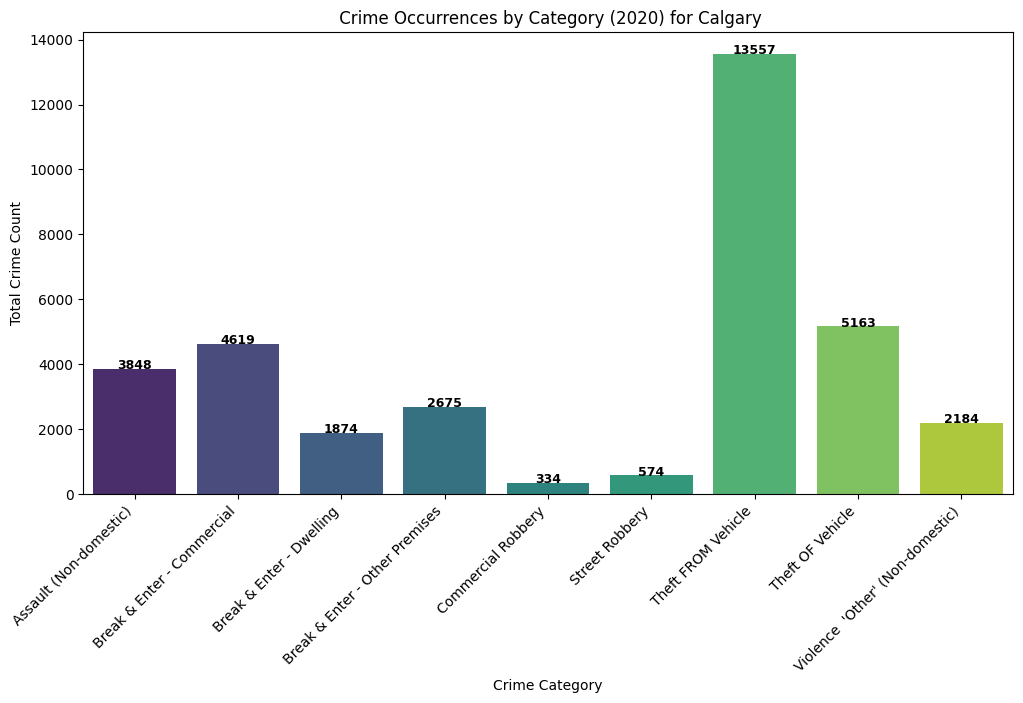

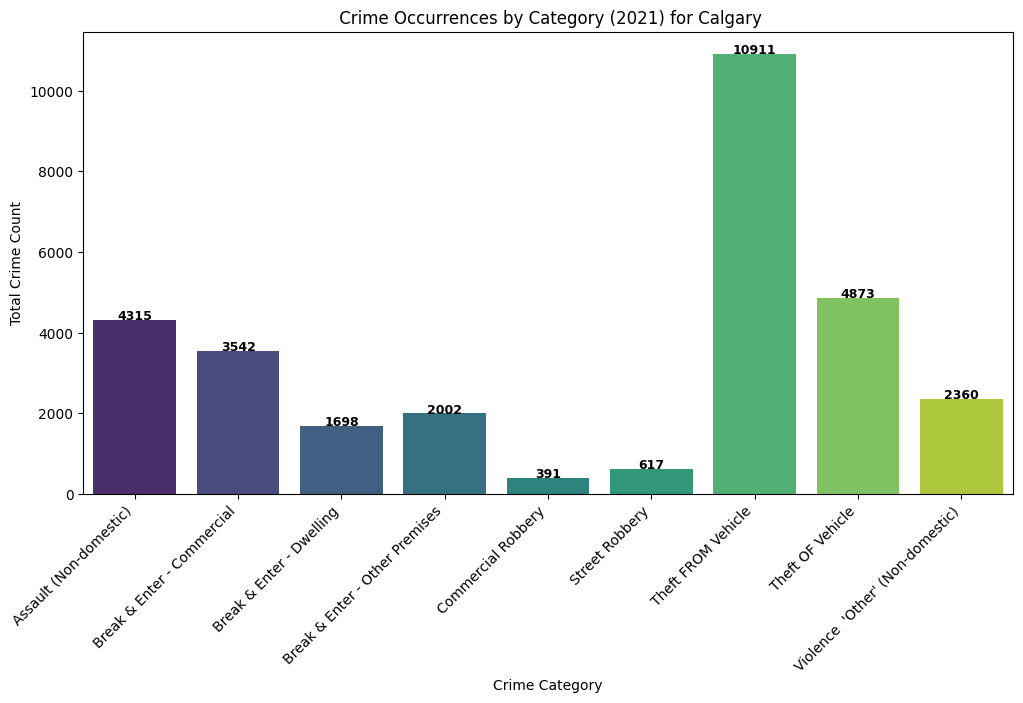

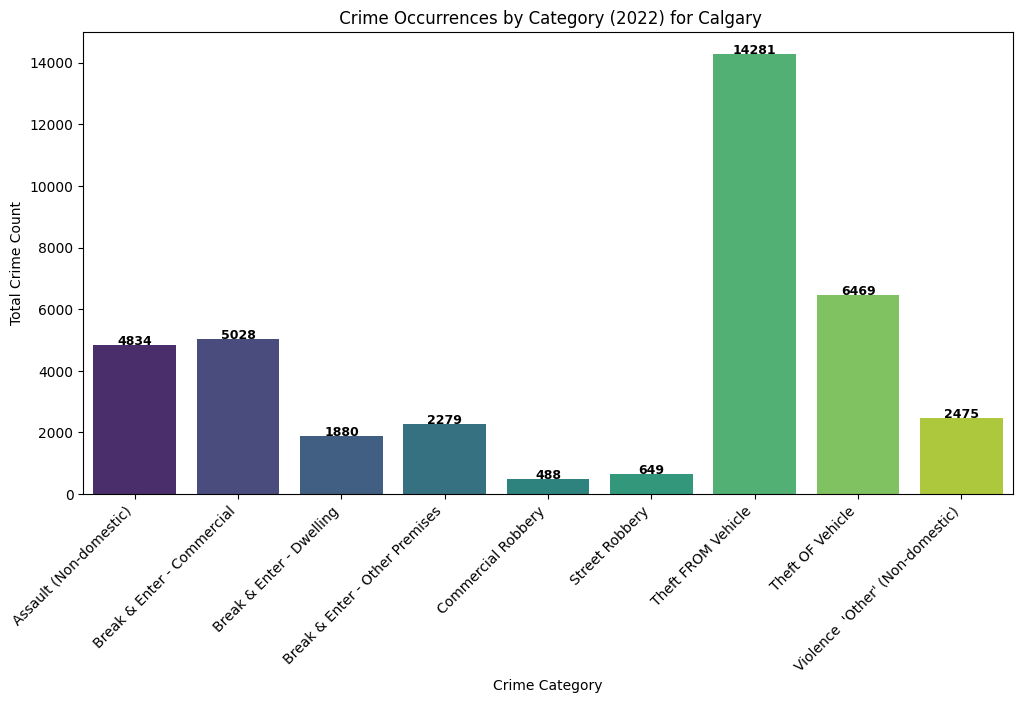

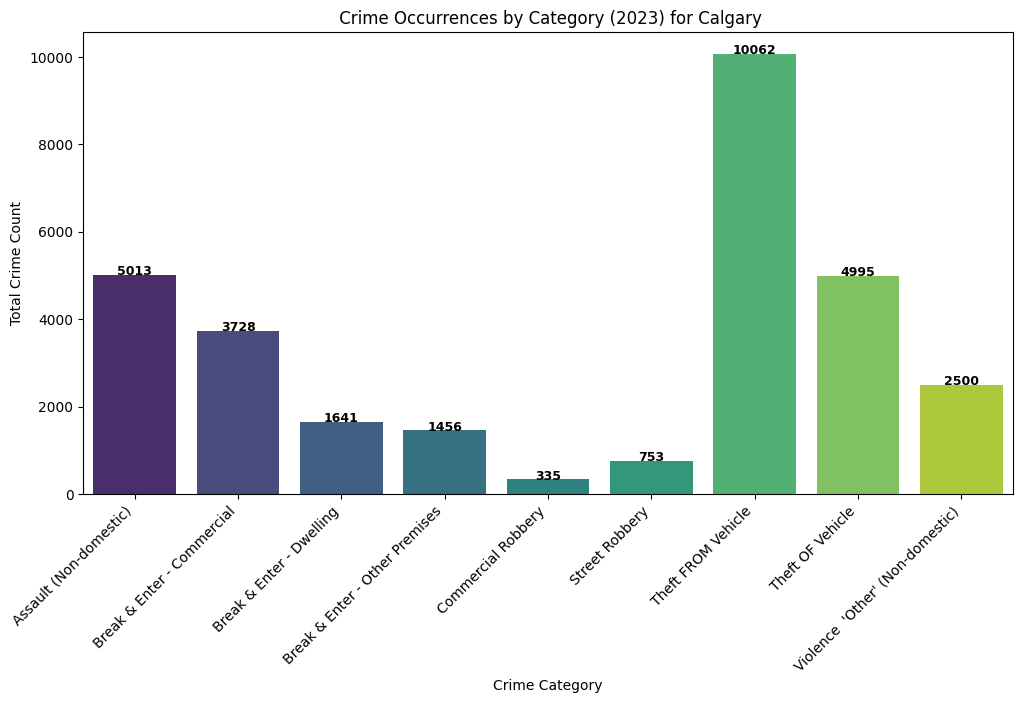

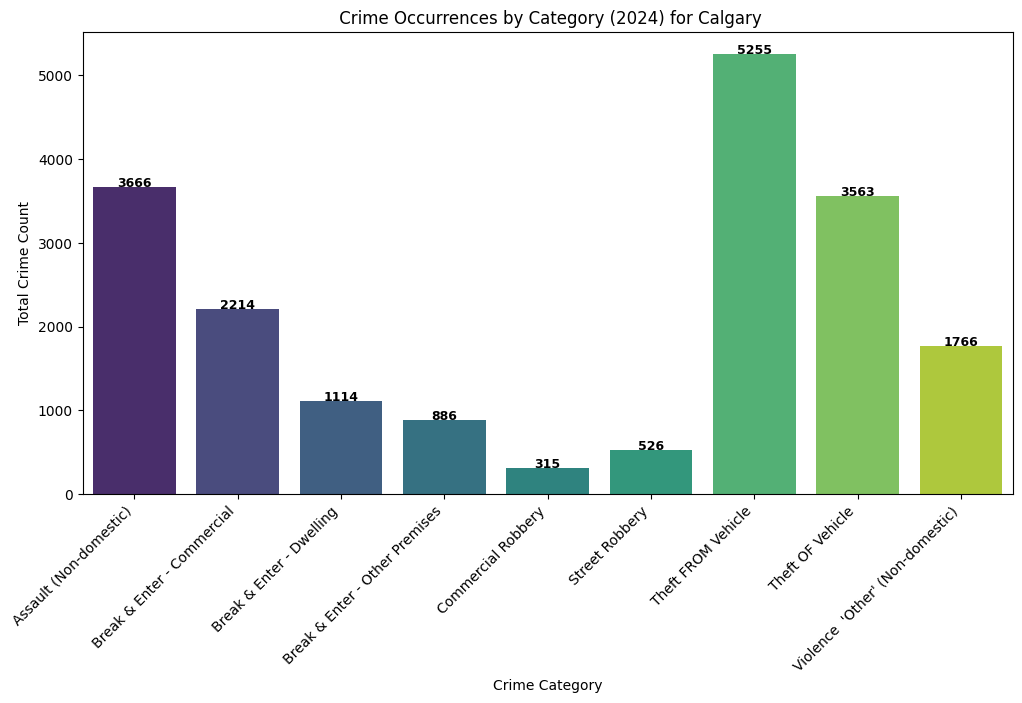

In [16]:
for year in years_in_view:
    crime_year = working_df[working_df["Year"] == year]
    crime_grouped = crime_year.groupby("Category")["Crime Count"].sum().reset_index()

    plt.figure(figsize=(12, 6))

    sns.barplot(
        x="Category",
        y="Crime Count",
        hue="Category",
        data=crime_grouped,
        palette="viridis",
        legend=False  # Remove legend since hue is used for colors
    )

    # Add annotations for each bar
    for index, row in crime_grouped.iterrows():
        plt.text(index, row["Crime Count"] + 2, f"{int(row['Crime Count'])}", 
                    ha="center", fontsize=9, fontweight="bold")

    plt.xlabel("Crime Category")
    plt.ylabel("Total Crime Count")
    plt.title(f" Crime Occurrences by Category ({year}) for {city}")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.show()

Key Observations: 

1. As described previously, Theft FROM Vehicle is the most frequenct crime every single year my a large margin. 

2. The peak was in 2022 with 14281 cases, probably due to covid restrictions lifting. It seems that in 2023 it declined again, maybe due to improved law enforcement. 

3. Theft OF Vehicle also showed a spike in 2022, and then a decline for the years after. It should be noted 2024 numbers will be lower due to loss of data from october onwards. 

4. Looking at the Assault category, there was an increase from 2020 onwards likely due to restrictions lifting and more altercations happening due to increased public activity. 

5. Street Robbery and commercial robbery remain consistently low. 


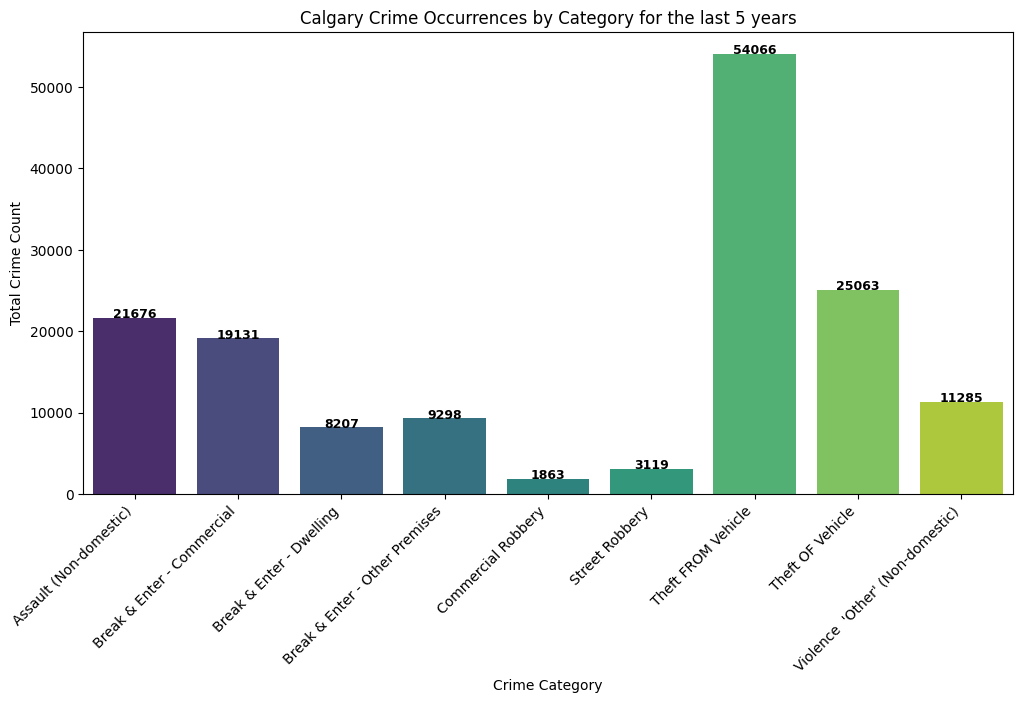

In [17]:
crime_filtered = working_df[working_df["Year"].isin(years_in_view)]
crime_grouped = crime_filtered.groupby("Category")["Crime Count"].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    x="Category",
    y="Crime Count",
    hue="Category",
    data=crime_grouped,
    palette="viridis",
    legend=False  # Remove legend since hue is used for colors
)

# Add annotations for each bar
for index, row in crime_grouped.iterrows():
    plt.text(index, row["Crime Count"] + 2, f"{int(row['Crime Count'])}", 
                ha="center", fontsize=9, fontweight="bold")

plt.xlabel("Crime Category")
plt.ylabel("Total Crime Count")
plt.title(f"{city} Crime Occurrences by Category for the last 5 years")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

Key Observations: 

1. Looking at the results above, "Theft FROM Vehicle" is the most consistent crime. Nearly double the occurence of any other crime. This could be due to low security parking, vehicles being left unattended during the cold. 

2. "Theft OF Vehicle" is the second most frequent crime. 

3. Break and enter has moderature occurences, and commercial and street robbery occur less frequently in comparison to the other categories. 


To answer our question more directly: Question 1: What are the types and counts of crimes that occurred in the last 5 years?

-The top 5 highest occuring crimes are Theft FROM Vehicles, Theft OF Vehicle, Assault (Non-domestic), Break and Enter- Commercial, Violence 'Other' (Non-domestic).

-Vehicle Related Crimes are the crimes that occur the most in Calgary 

-Vehicle related crime and Assault show winter peaks. 


## 7. Question 2: Which are the top 5 recurring crimes for each season in the last 5 years? <a name="#q-2"></a>

To determine the most frequently occurring crimes for each city in the last five years, we categorized the year into four seasons based on quarters:
	
1.	Winter: December – February
2.	Spring: March – May
3.	Summer: June – August
4.	Fall: September – November

A challenge in analyzing seasonal crime trends is handling December since Winter spans two calendar years, December from the previous year and January – February from the current year. To keep the data accurate, we included December from the prior year when calculating Winter trends

We sorted the data by year and month, assigned months to their seasons, filtered for each season, and plotted the trends using a line graph for each year and also an aggregation for the last 5 years.

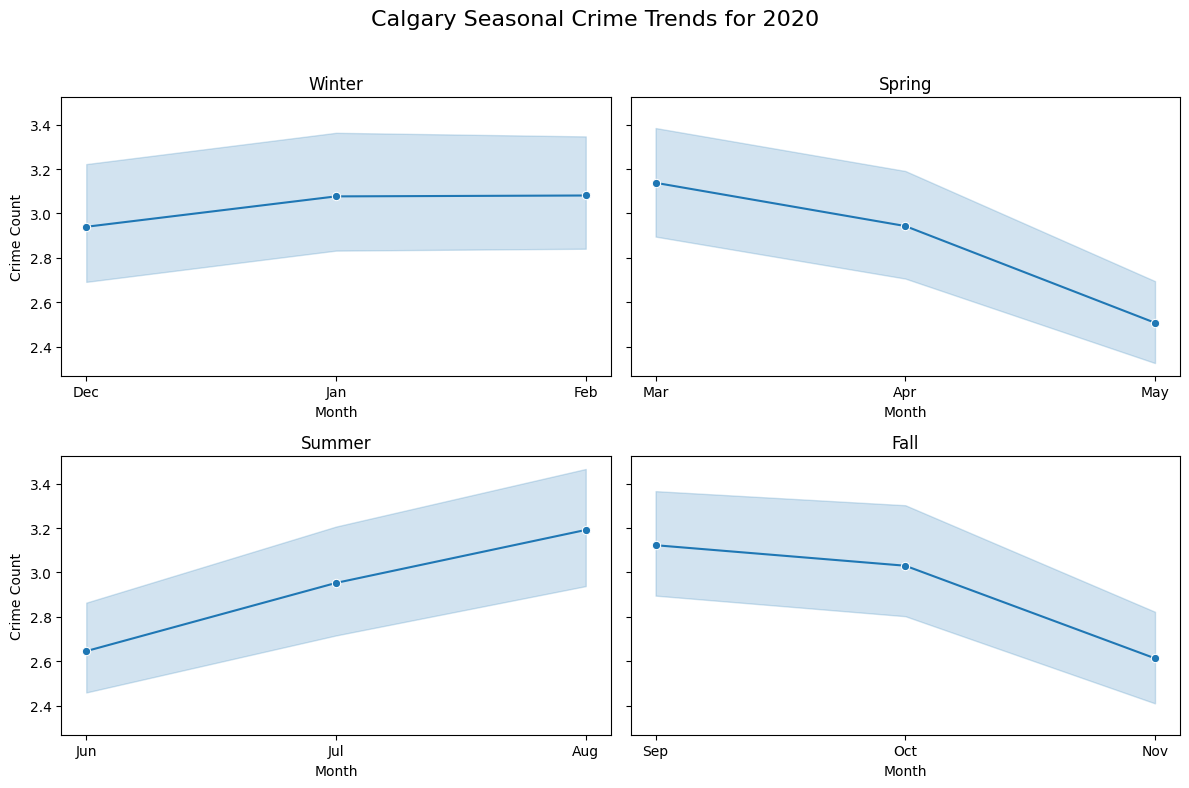

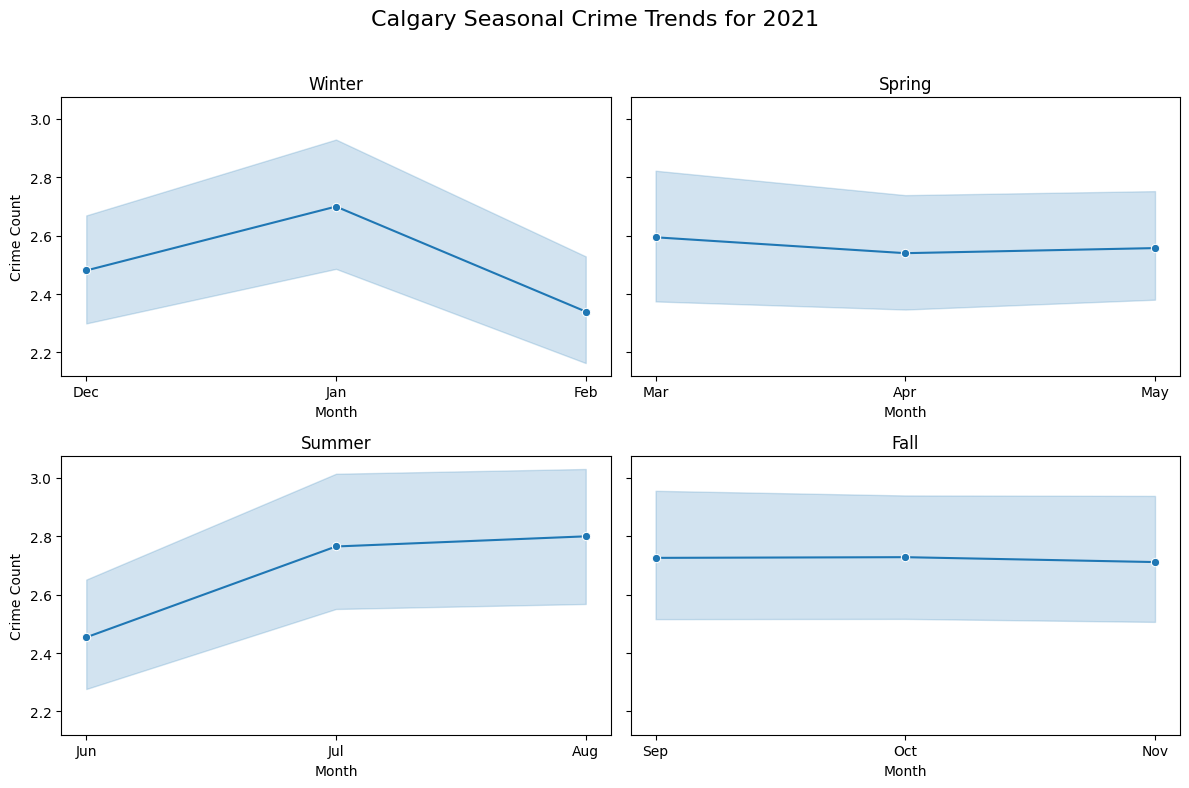

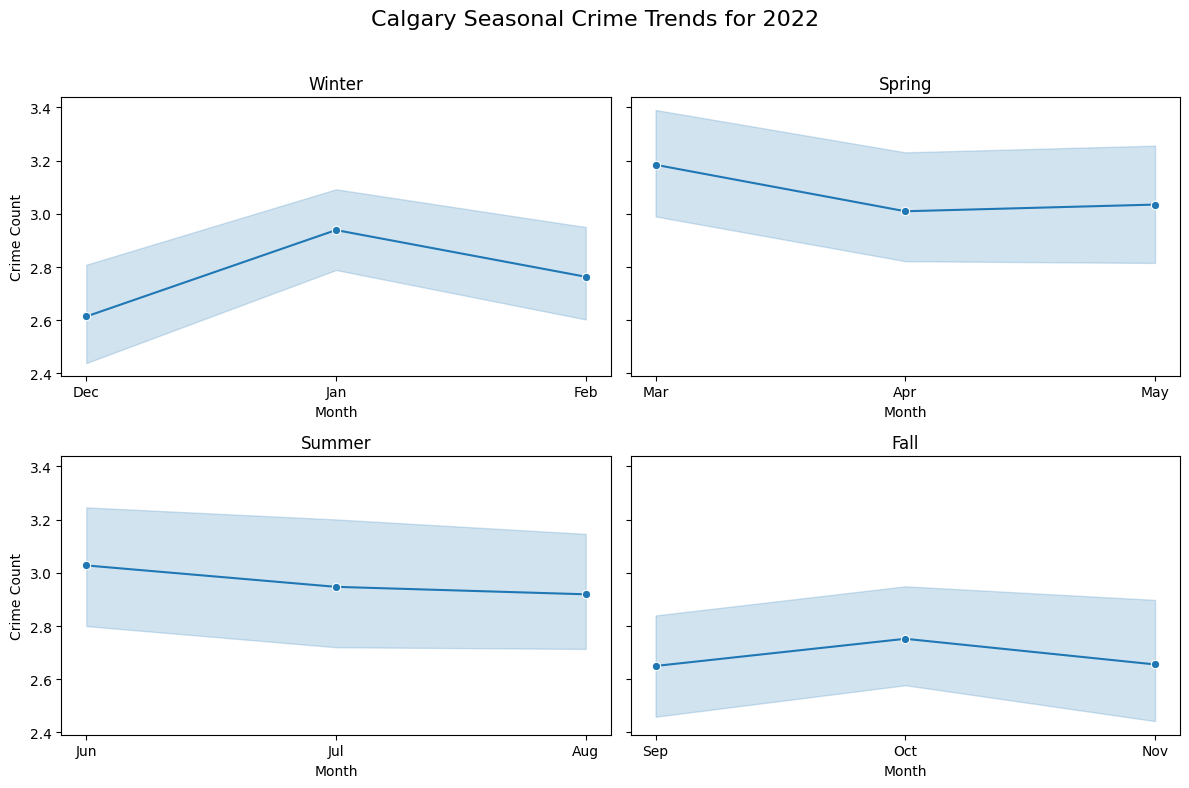

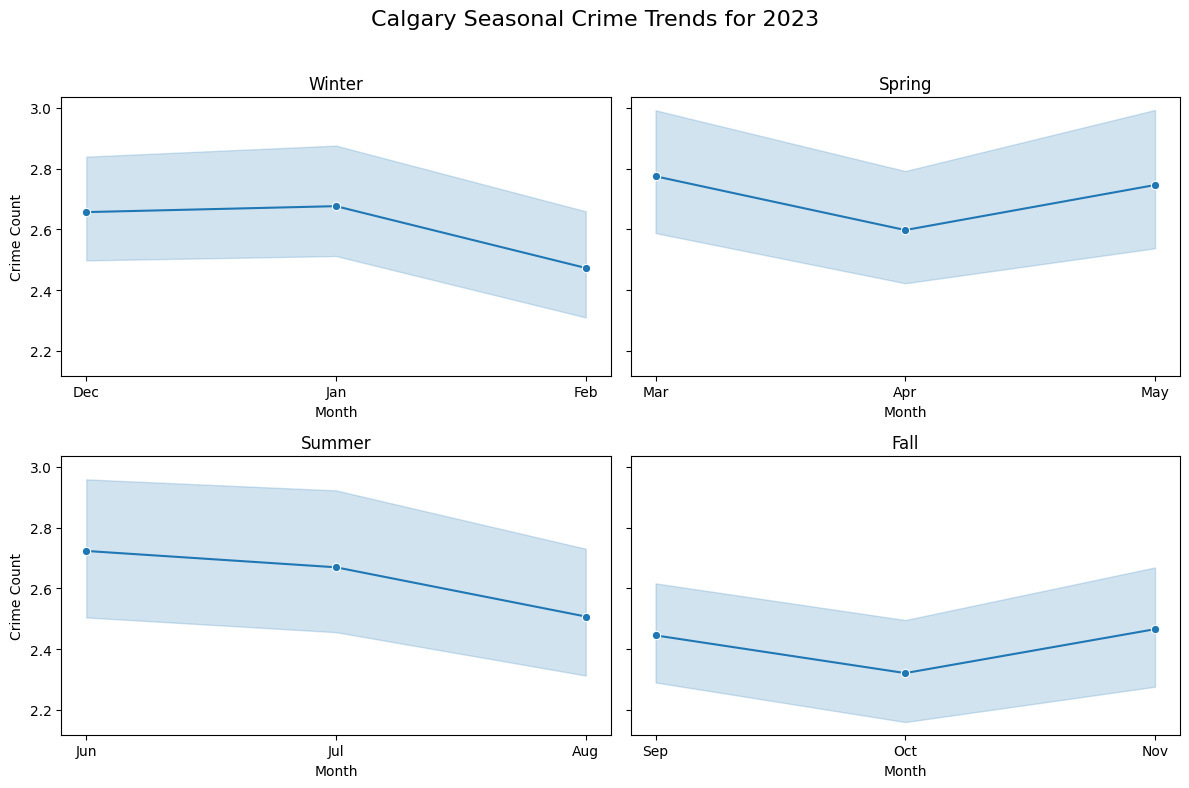

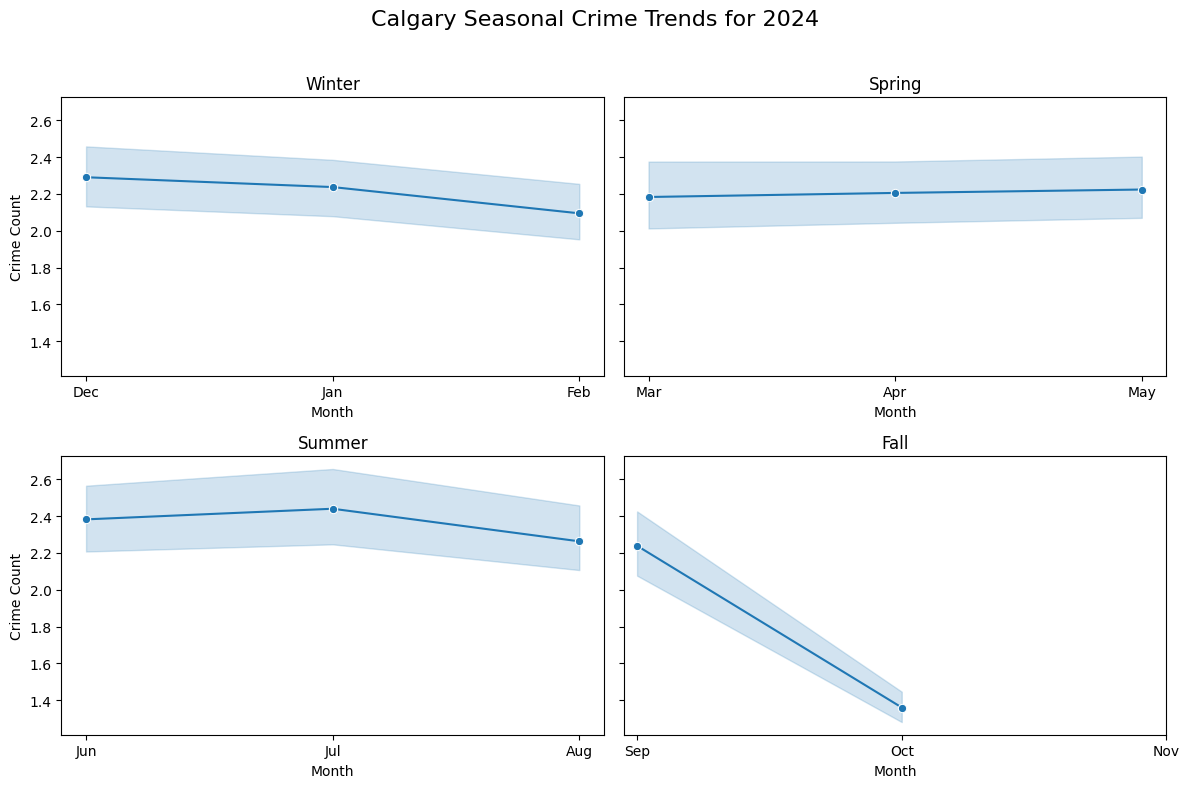

In [18]:
df_extended = working_df.copy()
    
df_extended = df_extended.sort_values(by=["Year", "Month"], ascending=[True, True])

season_months = {
    "Winter": [0, 1, 2],  # December is now 0
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}


for year in sorted(df_extended["Year"].unique())[-5:]:
    df_year = df_extended[df_extended["Year"] == year]
    seasons = ["Winter", "Spring", "Summer", "Fall"]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
    fig.suptitle(f"{city} Seasonal Crime Trends for {year}", fontsize=16)
    
    for i, season in enumerate(seasons):
        df_season = df_year[df_year["Season"] == season].copy()
        
        df_season["AdjustedMonthCat"] = pd.Categorical(df_season["Month"].astype(int), 
                                                        categories=season_months[season], 
                                                        ordered=True)

        df_season = df_season.sort_values("AdjustedMonthCat")

        ax = axes[i // 2, i % 2]
        sns.lineplot(ax=ax, data=df_season, x="AdjustedMonthCat", y="Crime Count", marker="o")
        
        ax.set_title(season)
        ax.set_xlabel("Month")
        ax.set_ylabel("Crime Count")
        
        ax.set_xticks(season_months[season])
        ax.set_xticklabels(["Dec", "Jan", "Feb"] if season == "Winter" else 
                            ["Mar", "Apr", "May"] if season == "Spring" else 
                            ["Jun", "Jul", "Aug"] if season == "Summer" else 
                            ["Sep", "Oct", "Nov"])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

The seasonal crime trends from 2020 to 2024 follow a consistent pattern. Winter and Summer show increasing crime rates, with Winter crime rising from December to January before leveling off in February, while Summer crime peaks between June and August. Spring and Fall, on the other hand, show a decline, with crime decreasing from March to May and September to November. Notably, Fall 2024 saw a sharper drop compared to previous years, while Summer consistently had the highest crime levels. Winter remained more stable, with less fluctuation in crime rates.

These patterns suggest that crime prevention efforts should focus on Summer, when crime is at its highest, and early Winter (December–January), when there is a slight but steady increase. The sharp decline in Fall 2024 could indicate effective crime reduction strategies or an anomaly that needs further review. Overall, crime trends have remained predictable across years, providing valuable insight for planning crime prevention measures.

C:\Users\Ravin\AppData\Local\Temp\ipykernel_3984\3549629455.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "Crime Count"))


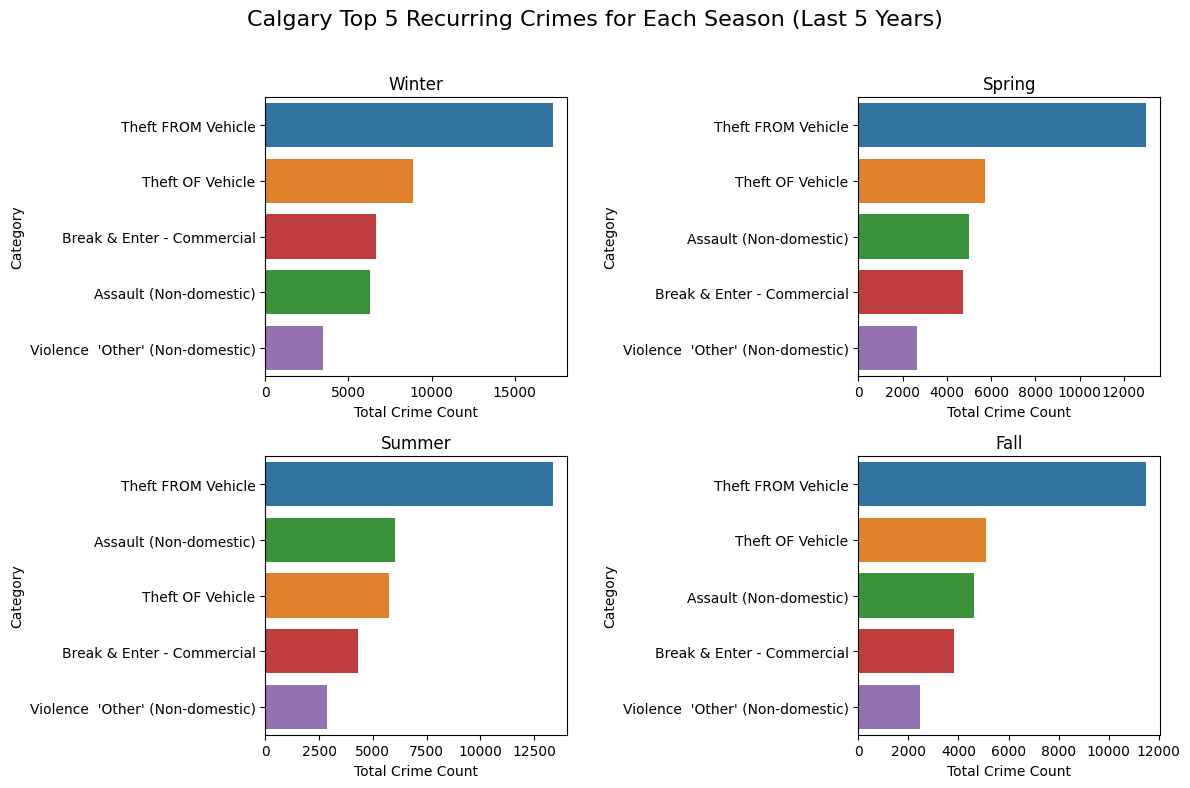

In [19]:
df_extended = working_df.copy()
    
df_extended = df_extended.sort_values(by=["Year", "Month"], ascending=[True, True])

season_months = {
    "Winter": [0, 1, 2],  # December is now 0
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}

# Create Month 0 rows by carrying over December values to the next year
new_rows = []
for year in df_extended["Year"].unique():
    df_december = df_extended[(df_extended["Year"] == year) & (df_extended["Month"] == 12)].copy()
    if not df_december.empty:
        df_december["Year"] = year + 1  # Shift to the next year
        df_december["Month"] = 0  # Set Month to 0
        new_rows.append(df_december)

if new_rows:
    df_extended = pd.concat([df_extended] + new_rows, ignore_index=True)
    df_extended = df_extended.sort_values(by=["Year", "Month"], ascending=[True, True])


df_extended["Season"] = df_extended["Month"].apply(convert_month_season)

df_last_5_years = df_extended[df_extended["Year"].isin(years_in_view)]

df_seasonal_crime = (
    df_last_5_years.groupby(["Season", "Category"], as_index=False)["Crime Count"]
    .sum()
)

top_5_per_season = (
    df_seasonal_crime.groupby("Season", group_keys=False, as_index=False)
    .apply(lambda x: x.nlargest(5, "Crime Count"))
    .reset_index(drop=True)
)

unique_categories = top_5_per_season["Category"].unique()
category_palette = sns.color_palette("tab10", n_colors=len(unique_categories))
category_colors = dict(zip(unique_categories, category_palette))


seasons = ["Winter", "Spring", "Summer", "Fall"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"{city} Top 5 Recurring Crimes for Each Season (Last 5 Years)", fontsize=16)

for i, season in enumerate(seasons):
    df_season = top_5_per_season[top_5_per_season["Season"] == season]
    ax = axes[i // 2, i % 2]
    
    sns.barplot(
        ax=ax,
        data=df_season,
        x="Crime Count",
        y="Category",
        hue="Category", 
        palette=category_colors,
        legend=False  # Disable legend in subplots
    )
    
    ax.set_title(season)
    ax.set_xlabel("Total Crime Count")
    ax.set_ylabel("Category")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The top four recurring crimes across all seasons in Calgary over the last five years are Theft FROM Vehicle, Theft OF Vehicle, Break & Enter (Commercial), and Assault (Non-Domestic). These crimes remained consistent throughout the year, with Theft FROM Vehicle being the most frequent in every season.

A noticeable seasonal variation is Assault (Non-Domestic), which gradually increases as the year progresses, reaching its highest levels in Fall. This trend suggests that assaults become more frequent later in the year, while other crimes maintain a steady presence across all seasons.

## 8. Question 3: Which ward has the highest crime rate in the last 5 years? <a name="#q-3"></a>

Counting up all crimes within a ward, regardless of the category for the last 5 years. Then visualizing where we have the highest crime counts per ward using a heatmap. 

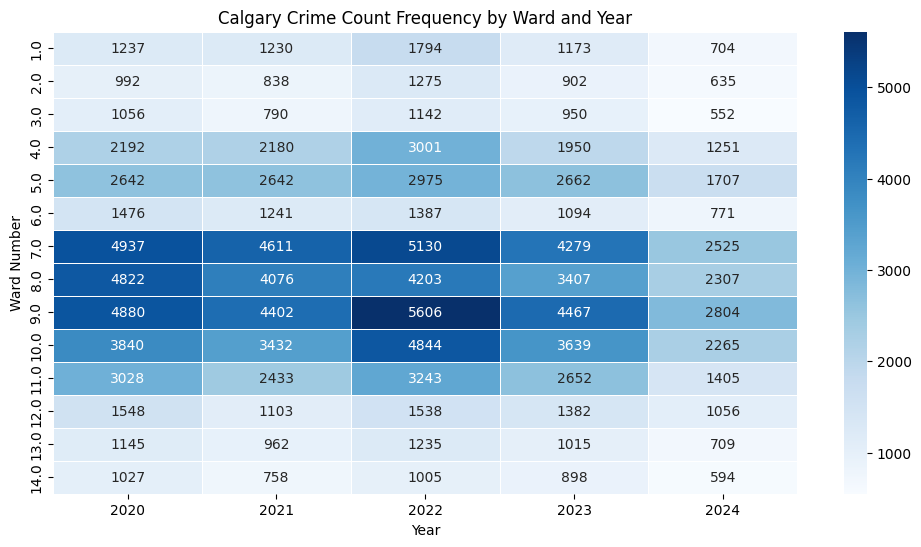

In [20]:
df_extended = working_df.copy()

df_extended = df_extended[df_extended["Year"].isin(years_in_view)]

crime_count_by_ward_aggregated_by_year = (df_extended.groupby(['Ward Number', 'Year'])['Crime Count'].sum().reset_index())

crime_count_by_ward_aggregated_heatmap_data = crime_count_by_ward_aggregated_by_year.pivot(index='Ward Number', columns='Year', values='Crime Count')

plt.figure(figsize=(12, 6))
sns.heatmap(crime_count_by_ward_aggregated_heatmap_data, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")

plt.xlabel("Year")
plt.ylabel("Ward Number")
plt.title(f"{city} Crime Count Frequency by Ward and Year")
plt.show()

Key Observations: 

1. Crime is concentrated in a few specific wards. Wards 7-11. There are some years where ward 5 has more crime than word 11. 

2. Looking year-over-year there is a clear spike in crime during 2022. This is likely due to post-pandemic activity. 
   
3. The drop in 2024 may be due to missing data, and future reports should address this gap.

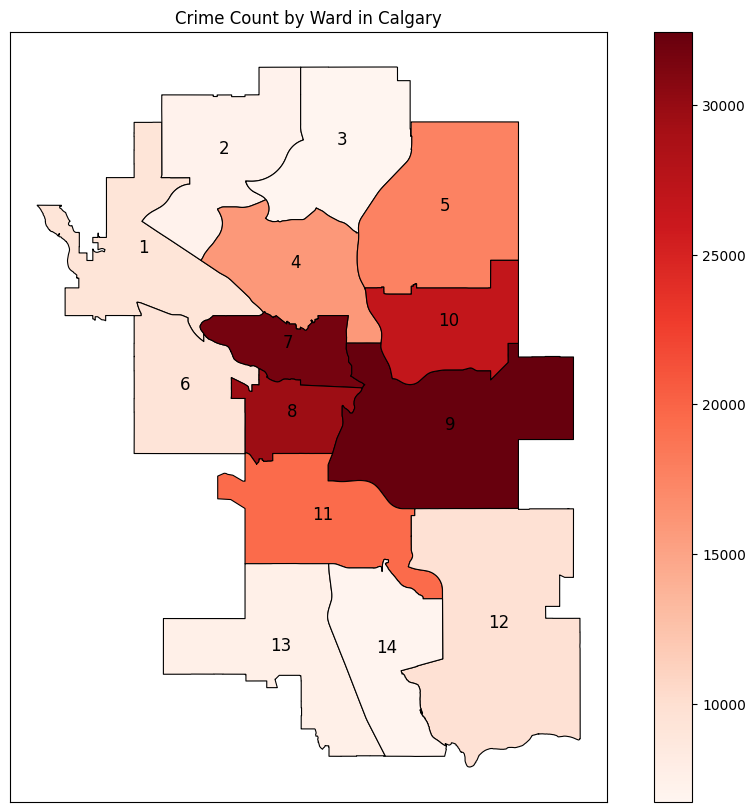

In [21]:
crime_summary = working_df.groupby("Ward Number")["Crime Count"].sum().reset_index()
    
city_geo_df = calgary_geo_map.merge(crime_summary, on="Ward Number", how="left")

if city_geo_df.crs.is_geographic:
    city_geo_df = city_geo_df.to_crs(epsg=3857)

city_geo_df["centroid"] = city_geo_df.geometry.centroid

fig, ax = plt.subplots(figsize=(12, 10))

city_geo_df.plot(column="Crime Count", cmap="Reds", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

ax.set_xticks([])
ax.set_yticks([])


for idx, row in city_geo_df.iterrows():
    centroid = row["centroid"]
    ax.text(centroid.x, centroid.y, str(int(row["Ward Number"])), fontsize=12, ha='center', color='black')

ax.set_title(f"Crime Count by Ward in {city}")

plt.show()

Key Observations: 

1. Crime is highly concentrated in central and commercial areas like Wards 7-10.
2. Ward 5 and 11 show similar activity in crime
3. Crime reduction efforts should focus on these central zones. 
4. It logically makes sense that we are seeing more crime in downtown, where more people are congregating. The suburbs have much less crime activity, likely due to less activity between citizens. 


## 9. Question 4: Identifying relationship between crime count and disorder count. <a name="#q-4"></a>
We analyzed the connection between crime count and community disorder count using a scatter plot to see if higher disorder levels were linked to more crime. This helped us spot any patterns or trends between the two.

To confirm the relationship, we also calculated the correlation coefficient, which measures how strongly the two variables are related. This showed whether an increase in disorder led to more crime or if there was little connection between them.

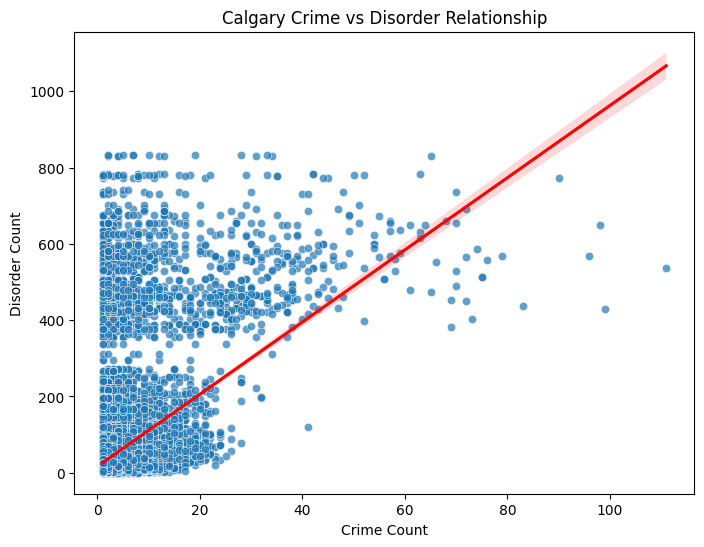

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=working_df['Crime Count'], y=working_df['Disorder Count'], alpha=0.7)
sns.regplot(x=working_df['Crime Count'], y=working_df['Disorder Count'], scatter=False, color='red')
plt.xlabel('Crime Count')
plt.ylabel('Disorder Count')
plt.title(f'{city} Crime vs Disorder Relationship')
plt.show()

The analysis shows a positive correlation between crime and disorder counts, as indicated by the red regression line. Areas with higher crime rates tend to have more disorder incidents, but the relationship is not perfect

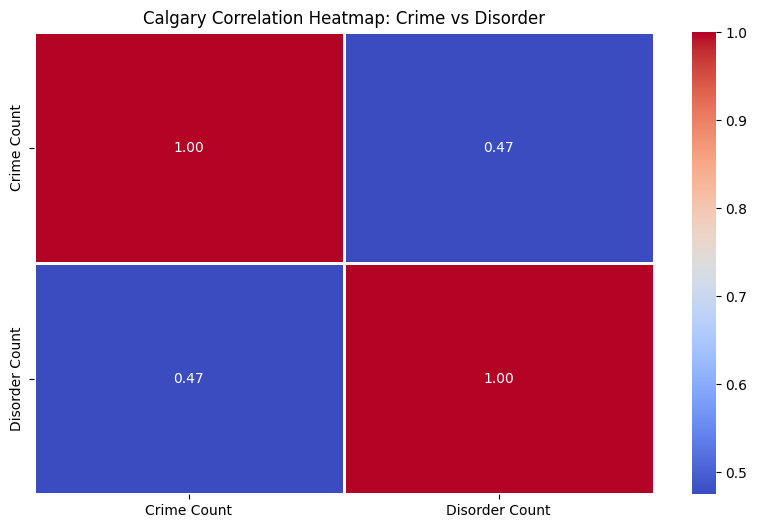

In [23]:
corr_matrix = working_df[['Crime Count', 'Disorder Count']].corr()
    
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title(f'{city} Correlation Heatmap: Crime vs Disorder')
plt.show()

The heatmap shows the correlation between crime count and disorder count in Calgary. The correlation coefficient of 0.47 suggests a moderate positive relationship between crime and disorder. This means that areas with higher crime rates tend to have more disorder incidents, but the relationship is not very strong.

## 10. Conclusions and Suggestions <a name="conclusion"></a>

**Theft FROM Vehicle** has consistently been the highest reported crime. Other top crimes include **Theft OF Vehicle, Break & Enter (Commercial), Assault (Non-Domestic), and Violence (Non-Domestic).**

There is also a noticeable relationship between **crime count and community disorder**, with crimes peaking **most in summer**. Additionally, **Assault (Non-Domestic) increases steadily throughout the year**.

A key recommendation is to **first address Theft FROM Vehicle**, as its rate is **double that of other categories**. Stronger punishments for convicted offenders and encouraging vehicle owners to install **security devices** could help curb this issue. The City of Calgary could create a public awareness campaign to address vehicle theft. 

Police should also **monitor the rise in Assault (Non-Domestic)**, as it escalates throughout the year. Early intervention in the **first season** could prevent further increases.

Finally, if the overall **crime count can be reduced, it is likely that community disorder will also decrease**. A combined effort involving law enforcement, stricter policies, and community awareness will be essential in tackling Calgary's crime trends.


## 11. Contributions <a name="contributions"></a>

- **Ravin** solved **Questions 1 and 3** and plotted the graphs.
- **Joshua** solved **Questions 2 and 4** and created the visualizations.
- **Prince** contributed to refining **Questions 2 and 3**.
- **All group members collaborated using Git** to continuously refine the final report.


## 12. References <a name="references"></a>

City of Calgary. (Feb 5 2020). Community Crime Statistics. Retrieved January 19, 2025, from https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/78gh-n26t/about_data

City of Calgary. (March 14 2017). Communities by Ward. Retrieved January 19, 2025, from https://data.calgary.ca/Government/Communities-by-Ward/jd78-wxjp/about_data

Alberta Climate Information Service (ACIS). (2018). Monthly Weather Data. Retrieved January 19, 2025, from https://acis.alberta.ca/weather-data-viewer.jsp

Calgary Disorder Data  –  https://data.calgary.ca/Health-and-Safety/Community-Disorder-Statistics/h3h6-kgme/about_data

Data 602 lecture notes -- Syyed Tauhid Ullah Shah https://github.com/SyedTauhidUllahShah/DATA601W25
